[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/simple-graph.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238187-lesson-2-simple-graph)

# The Simplest Graph

Let's build a simple graph with 3 nodes and one conditional edge. 

![Screenshot 2024-08-20 at 3.11.22 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dba5f465f6e9a2482ad935_simple-graph1.png)

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph

## State

First, define the [State](https://langchain-ai.github.io/langgraph/concepts/low_level/#state) of the graph. 

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the `TypedDict` class from python's `typing` module as our schema, which provides type hints for the keys.

In [2]:
from typing_extensions import TypedDict

# Call TypeDict to make the State
class State(TypedDict):
    graph_state: str
    
# State - Graph State
# We need to define what structure we believe the nodes and edges will have in our graph
# Graph = the chart of basically how you want the nodes, edges, workflow to be
# State = the schema or roadmap of how the graph looks like
# Graph State = the state of the system at this specific node
# We are initializing the state object since we need to define state at each node

## Nodes

[Nodes](https://langchain-ai.github.io/langgraph/concepts/low_level/#nodes) are just python functions.

The first positional argument is the state, as defined above.

Because the state is a `TypedDict` with schema as defined above, each node can access the key, `graph_state`, with `state['graph_state']`.

Each node returns a new value of the state key `graph_state`.
  
By default, the new value returned by each node [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior state value.

In [3]:
# Recursion

def node_1(state): # param state = graph state
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"} 
# modify it in dictionary, 1 key, graph state for each node
# Takes in the state, and overrides the state with graph state with some word or content

# The graph state is defined as a key, and the state["graph_state"] is defined as 
# State - a dictionary describing current state of the system, for example, under node1, it describes the graph state

def node_2(state):
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def node_3(state):
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}

## Edges

[Edges](https://langchain-ai.github.io/langgraph/concepts/low_level/#edges) connect the nodes.

Normal Edges are used if you want to *always* go from, for example, `node_1` to `node_2`.

[Conditional Edges](https://langchain-ai.github.io/langgraph/reference/graphs/?h=conditional+edge#langgraph.graph.StateGraph.add_conditional_edges) are used want to *optionally* route between nodes.
 
Conditional edges are implemented as functions that return the next node to visit based upon some logic.

In [4]:
import random
from typing import Literal


# Define Conditional Edge - optionally route between nodes
def decide_mood(state) -> Literal["node_2", "node_3"]:
    
    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state'] 
    
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"
    
    # 50% of the time, we return Node 3
    return "node_3"

# Conditional Edge - condition to pick Node 2 or Node 3
# In this case, it's a random function between 50-50 to route them

## Graph Construction

Now, we build the graph from our [components](
https://langchain-ai.github.io/langgraph/concepts/low_level/) defined above.

The [StateGraph class](https://langchain-ai.github.io/langgraph/concepts/low_level/#stategraph) is the graph class that we can use.
 
First, we initialize a StateGraph with the `State` class we defined above.
 
Then, we add our nodes and edges.

We use the [`START` Node, a special node](https://langchain-ai.github.io/langgraph/concepts/low_level/#start-node) that sends user input to the graph, to indicate where to start our graph.
 
The [`END` Node](https://langchain-ai.github.io/langgraph/concepts/low_level/#end-node) is a special node that represents a terminal node. 

Finally, we [compile our graph](https://langchain-ai.github.io/langgraph/concepts/low_level/#compiling-your-graph) to perform a few basic checks on the graph structure. 

We can visualize the graph as a [Mermaid diagram](https://github.com/mermaid-js/mermaid).

In [6]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

In [14]:
# # Let's try a simple one-way structure with only 2 nodes

# newb = StateGraph(State)
# newb.add_node("node_1", node_1) # Define your first node
# newb.add_node("node_2", node_2)

# # Build it out. Add_edge's point is to connect nodes to each other
# newb.add_edge(START, "node_1")
# newb.add_edge(START, "node_2")
# newb.add_edge("node_1", END)
# newb.add_edge("node_2", END)

# # Put this together
# new_graph = newb.compile()

# # Visualize this new graph
# display(Image(new_graph.get_graph().draw_mermaid_png()))
# # Draw mermaid is a common framework for drawing charts using Python, since the structure is always head -> content -> tail

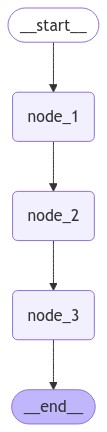

In [16]:
# STEP 1 - Build graph structure
# You do NOT define the Start and End Nodes, it already exists in the StateGraph object
builder = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# STEP 2 - Build out the logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood) # Beginning at node_1, it is our input layer. 
# Ask to input something, as seen from user input
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# STEP 2 - Experimentation:
# builder.add_edge(START, "node_1")
# builder.add_edge("node_1", "node_2")
# # builder.add_conditional_edges("node_1", decide_mood) # Beginning at node_1, it is our input layer. 
# # # Ask to input something, as seen from user input
# builder.add_edge("node_2", "node_3")
# builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

# Note - this is reading from the .py file in the Studio

## Graph Invocation

The compiled graph implements the [runnable](https://python.langchain.com/v0.1/docs/expression_language/interface/) protocol.

This provides a standard way to execute LangChain components. 
 
`invoke` is one of the standard methods in this interface.

The input is a dictionary `{"graph_state": "Hi, this is lance."}`, which sets the initial value for our graph state dict.

When `invoke` is called, the graph starts execution from the `START` node.

It progresses through the defined nodes (`node_1`, `node_2`, `node_3`) in order.

The conditional edge will traverse from node `1` to node `2` or `3` using a 50/50 decision rule. 

Each node function receives the current state and returns a new value, which overrides the graph state.

The execution continues until it reaches the `END` node.

In [13]:
# Start the graph. 
# Recall - Invoke is a method to start a graph
graph.invoke({"graph_state" : "Hi, this is Lance."})

# Because the decision criteria or edge for Node 1 to Node2/Node3 is 50-50

# Synchronously - sequence of actions. We wait for something from Node 1's edge before the rest of the flow can continue
# Async - happens in parallel

---Node 1---
---Node 3---


{'graph_state': 'Hi, this is Lance. I am sad!'}

`invoke` runs the entire graph synchronously.

This waits for each step to complete before moving to the next.

It returns the final state of the graph after all nodes have executed.

In this case, it returns the state after `node_3` has completed: 

```
{'graph_state': 'Hi, this is Lance. I am sad!'}
```

In [ ]:
# Good job Christine!